<a href="https://colab.research.google.com/github/Sourav2ch/ANN/blob/master/Fake_satirical_detection2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment EE514: Fake News detection

## Step 1:  Loading the data and important libraries

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [4]:
from google.colab import files
files.upload()

Saving fake_news.json to fake_news (5).json


{'fake_news.json': b'{"is_sarcastic": 1, "headline": "thirtysomething scientists unveil doomsday clock of hair loss", "article_link": "https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205"}\r\n{"is_sarcastic": 0, "headline": "dem rep. totally nails why congress is falling short on gender, racial equality", "article_link": "https://www.huffingtonpost.com/entry/donna-edwards-inequality_us_57455f7fe4b055bb1170b207"}\r\n{"is_sarcastic": 0, "headline": "eat your veggies: 9 deliciously different recipes", "article_link": "https://www.huffingtonpost.com/entry/eat-your-veggies-9-delici_b_8899742.html"}\r\n{"is_sarcastic": 1, "headline": "inclement weather prevents liar from getting to work", "article_link": "https://local.theonion.com/inclement-weather-prevents-liar-from-getting-to-work-1819576031"}\r\n{"is_sarcastic": 1, "headline": "mother comes pretty close to using word \'streaming\' correctly", "article_link": "https://www.theonion.com/mother-comes-p

In [5]:
!pip install contractions
!pip install num2words

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from wordcloud import WordCloud , STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import cohen_kappa_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
import random
ra = random.seed(101)
from bs4 import BeautifulSoup
import re, string, unicodedata
import inflect
p = inflect.engine()
from num2words import num2words
import spacy
nlp = spacy.load("en_core_web_sm")
#from pycontractions import Contractions
nltk.download('stopwords')
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [95]:
import itertools
import collections

In [7]:
fake = pd.read_json("fake_news.json", encoding= "utf-8", lines=True)
fake.head(30)

is_sarcastic  ...                                       article_link
0              1  ...  https://www.theonion.com/thirtysomething-scien...
1              0  ...  https://www.huffingtonpost.com/entry/donna-edw...
2              0  ...  https://www.huffingtonpost.com/entry/eat-your-...
3              1  ...  https://local.theonion.com/inclement-weather-p...
4              1  ...  https://www.theonion.com/mother-comes-pretty-c...
5              0  ...  https://www.huffingtonpost.com/entry/my-white-...
6              0  ...  https://www.huffingtonpost.com/entry/5-ways-to...
7              1  ...  https://www.theonion.com/richard-bransons-glob...
8              1  ...  https://politics.theonion.com/shadow-governmen...
9              0  ...  https://www.huffingtonpost.comhttp://pubx.co/6...
10             0  ...  https://www.huffingtonpost.com/entry/this-lesb...
11             0  ...  https://www.huffingtonpost.com/entry/amanda-pe...
12             0  ...  https://www.huffingtonpost.com/entry/what-to-k...
13             0  ...  https://www.huffingtonpost.com/entry/chris-chr...
14             1  ...  https://www.theonion.com/ford-develops-new-suv...
15             0  ...  https://www.huffingtonpost.com/entry/uber-ceo-...
16             1  ...  https://www.theonion.com/area-boy-enters-jumpi...
17             1  ...  https://local.theonion.com/area-man-does-most-...
18             0  ...  https://www.huffingtonpost.com/entry/leave-no-...
19             0  ...  https://www.huffingtonpost.com/entry/lin-manue...
20             0  ...  https://www.huffingtonpost.com/entry/journalis...
21             1  ...  https://www.theonion.com/guard-in-video-game-u...
22             0  ...  https://www.huffingtonpost.com/entry/healthy-l...
23             0  ...  https://www.huffingtonpost.comhttps://www.thed...
24             0  ...  https://www.huffingtonpost.com/entry/bill-clin...
25             1  ...  https://www.theonion.com/secret-service-agent-...
26             0  ...  https://www.huffingtonpost.com/entry/this-new-...
27             0  ...  https://www.huffingtonpost.com/entry/things-le...
28             0  ...  https://www.huffingtonpost.com/entry/lamelo-ba...
29             0  ...  https://www.huffingtonpost.com/entry/im-bi-it-...

[30 rows x 3 columns]

In [ ]:
fake.isnull().sum()   ### checking for missing values in the data

is_sarcastic    0
headline        0
article_link    0
dtype: int64

0    14985
1    13634
Name: is_sarcastic, dtype: int64


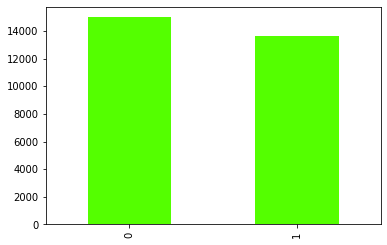

In [ ]:
print(fake.is_sarcastic.value_counts())
fake.is_sarcastic.value_counts().plot(kind = 'bar', cmap = "prism_r")

In [8]:
fake.to_csv('neww_fake.csv')   ####csv would be helpful while performing preprocessing
del fake["article_link"]  ### as this will have so use in our analysis and rather would add noise in the data

In [9]:
new_fake = fake.copy()
new_fake_new= fake.copy()
new_fake.head()

is_sarcastic                                           headline
0             1  thirtysomething scientists unveil doomsday clo...
1             0  dem rep. totally nails why congress is falling...
2             0  eat your veggies: 9 deliciously different recipes
3             1  inclement weather prevents liar from getting t...
4             1  mother comes pretty close to using word 'strea...

# step2 : Data Cleaning and Preprocessing

In [9]:
new_fake.dtypes

is_sarcastic     int64
headline        object
dtype: object

In [10]:
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", 
                    "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would",
                    "he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will",
                    "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have",
                    "I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
                    "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
                    "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", 
                    "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                    "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not",
                    "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not",
                    "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not",
                    "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", 
                    "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": 
                    "should have", "shouldn't": "should not", "shouldn't've": "should not have", 
                    "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", 
                    "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have",
                    "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                    "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                    "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will",
                    "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will",
                    "what'll've": "what will have", "what're": "what are",  "what's": "what is", 
                    "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did",
                    "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", 
                    "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", 
                    "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
                    "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are",
                    "y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re

contractions, contractions_re = _get_contractions(contraction_dict)

def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)

# Usage
replace_contractions("wouldn't a text with contraction")

'would not a text with contraction'

In [11]:
ps = PorterStemmer()
lemma_ =  WordNetLemmatizer()

In [12]:
#  defining the stop words in the dict
Stopwords = set(stopwords.words('english'))
exclude_words = set(["no", "not", "being"])
Stopwords = Stopwords - exclude_words
punc = list(string.punctuation)
Stopwords.update(punc)

In [13]:
# numbers might play an important role and may have patterns that might be useful 
# converting number is subsequent words
def digits2words(phrase, lang='en'):
    wordified = ''
    for word in phrase.split():
        if word.isnumeric():
            word = num2words(float(word), lang=lang)
        wordified = wordified + word + " "
    return wordified[:-1]


In [14]:
 def ord2words(text):
        wordified = ''
        for word in text.split():
            if word.isnumeric():
                word = ordinal2words(word)
            wordified = wordified + word + " "
        return wordified
        

In [15]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily") ### example

'My system keep crash ! his crash yesterday , ours crash daily'

In [16]:
### removing sapce between words and number  ex:2boys etc
def seperate_word_num(text):
    pattern = re.compile(r"([\d+])([a-zA-Z]+)")
    cleaned = pattern.sub(r"\1 \2",text)
    return cleaned

In [17]:
## creating a wrapper function for cleaning the text
def clean_data(text,contraction_expansion=True):
    text = text.lower()
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    text = seperate_word_num(text)
    text = text.replace(" th ", " ")
    text = replace_contractions(text)
    text = ' '.join(word for word in text.split() if word not in Stopwords)
    #text = re.sub(r'[^0-9a-z]?th\b', " th", text)
    text = digits2words(text)
    text = re.sub(r'[^A-Za-z0-9]', " ", text)
    text = lemmatize_text(text)
    text = re.sub(r'http\S+', '', text)
    text = digits2words(text)
    text = re.sub(r'[[:punct:]]', "", text)
    text = " ".join([ps.stem(word) if word in text.split() else word for word in text.split()])
    #text = ' '.join(word for word in text.split() if word not in Stopwords)
    text = digits2words(text)
    #text = nlp(text)
    return text

In [16]:
def clean_data2(text,contraction_expansion=True):   #### without stemming
    text = text.lower()
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    text = seperate_word_num(text)
    text = text.replace(" th ", " ")
    text = replace_contractions(text)
    text = ' '.join(word for word in text.split() if word not in Stopwords)
    #text = re.sub(r'[^0-9a-z]?th\b', " th", text)
    text = digits2words(text)
    text = re.sub(r'[^A-Za-z0-9]', " ", text)
    text = lemmatize_text(text)
    text = re.sub(r'http\S+', '', text)
    text = digits2words(text)
    text = re.sub(r'[[:punct:]]', "", text)
    #text = " ".join([ps.stem(word) if word in text.split() else word for word in text.split()])
    #text = ' '.join(word for word in text.split() if word not in Stopwords)
    text = digits2words(text)
    #text = nlp(text)
    return text

In [18]:
new_fake.headline = new_fake.headline.apply(clean_data)

In [17]:
new_fake_new.headline = new_fake_new.headline.apply(clean_data2)

In [20]:
new_fake_new.to_csv("new_ny.csv")
new_fake_new

is_sarcastic                                           headline
0                 1  thirtysomething scientist unveil doomsday cloc...
1                 0  dem rep totally nail congress fall short gende...
2                 0       eat veggie nine deliciously different recipe
3                 1            inclement weather prevent liar get work
4                 1  mother come pretty close use word stream corre...
...             ...                                                ...
28614             1             jews celebrate rosh hashasha something
28615             1  internal affairs investigator disappoint consp...
28616             0  beautiful acceptance speech week come queer ko...
28617             1  mars probe destroy orbit spielberg gates space...
28618             1                          dad clarify not food stop

[28619 rows x 2 columns]

In [17]:
new_fake
new_fake.to_csv('nee_fake.csv')

is_sarcastic                                           headline
0                 1  thirtysometh scientist unveil doomsday clock h...
1                 0  dem rep total nail congress fall short gender ...
2                 0                 eat veggi nine delici differ recip
3                 1            inclement weather prevent liar get work
4                 1  mother come pretti close use word stream corre...
...             ...                                                ...
28614             1                    jew celebr rosh hashasha someth
28615             1  intern affair investig disappoint conspiraci n...
28616             0        beauti accept speech week come queer korean
28617             1  mar probe destroy orbit spielberg gate space p...
28618             1                          dad clarifi not food stop

[28619 rows x 2 columns]

In [18]:
new_fake_new[5641:]

is_sarcastic                                           headline
5641              1  u s government set aside six hundred zero acre...
5642              0    teen mom star maci bookout give birth baby girl
5643              0      fate anti zika gmo mosquitos u s rest florida
5644              1  awkward conversation coworkers alternate venue...
5645              0  amazing grace bidding war erupt aretha frankli...
...             ...                                                ...
28614             1             jews celebrate rosh hashasha something
28615             1  internal affairs investigator disappoint consp...
28616             0  beautiful acceptance speech week come queer ko...
28617             1  mars probe destroy orbit spielberg gates space...
28618             1                          dad clarify not food stop

[22978 rows x 2 columns]

# Step3: Splitting the data into Train, Validation, Test_holdout set.
![](https://i.stack.imgur.com/pXAfX.png)


In [19]:
X = new_fake.headline.values
y = new_fake["is_sarcastic"].values

In [23]:
## dataset without stemming
X_nostem = new_fake_new.headline.values
y_nostem = new_fake_new['is_sarcastic'].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=ra,stratify=y)
print(f"Numbers of train instances by class: {np.bincount(y_train)}")
print(f"Numbers of test instances by class: {np.bincount(y_test)}")

Numbers of train instances by class: [11239 10225]
Numbers of test instances by class: [3746 3409]


In [25]:
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X_nostem, y_nostem, train_size=0.75, random_state=ra,stratify=y_nostem)
print(f"Numbers of train instances by class: {np.bincount(y_train_ns)}")
print(f"Numbers of test instances by class: {np.bincount(y_test_ns)}")

Numbers of train instances by class: [11239 10225]
Numbers of test instances by class: [3746 3409]


## In the above split we are using the stratified sampling in order to reduce the bias due to splitting of data
![](https://thumbs.dreamstime.com/z/stratified-sampling-example-vector-illustration-diagram-research-method-explanation-scheme-person-symbols-stages-175044570.jpg)


In [21]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, 
                                                    train_size=0.5, 
                                                    random_state=ra,
                                                    stratify=y_test)
    
print(f"Numbers of test instances by class: {np.bincount(y_test)}")

print(f"Numbers of validation instances by class: {np.bincount(y_val)}")

Numbers of test instances by class: [1873 1704]
Numbers of validation instances by class: [1873 1705]


In [27]:
X_test_ns, X_val_ns, y_test_ns, y_val_ns = train_test_split(X_test_ns, y_test_ns, 
                                                    train_size=0.5, 
                                                    random_state=ra,
                                                    stratify=y_test_ns)
    
print(f"Numbers of test instances by class: {np.bincount(y_test_ns)}")
print(f"Numbers of validation instances by class: {np.bincount(y_val_ns)}")

Numbers of test instances by class: [1873 1704]
Numbers of validation instances by class: [1873 1705]


In [21]:
X_train.shape,y_train.shape,X_test.shape, y_test.shape,X_val.shape,y_val.shape

((21464,), (21464,), (3577,), (3577,), (3578,), (3578,))

## Step 4: Feature extraction and useful data creation

In [30]:
#### Bag of words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
features_BOWw = vectorizer.fit_transform(X_nostem).toarray()
features_BOW = vectorizer.fit_transform(X_train_ns).toarray()
print(vectorizer.vocabulary_)
features_BOW_test = vectorizer.transform(X_test_ns).toarray()
features_BOW_valid = vectorizer.transform(X_val_ns).toarray()

{'woman': 18531, 'perfectly': 12323, 'break': 1951, 'not': 11461, 'just': 8937, 'nurse': 11524, 'area': 750, 'man': 10034, 'shitty': 15028, 'fuckin': 6506, 'job': 8822, 'trevor': 17132, 'noah': 11394, 'can': 2346, 'wrap': 18597, 'mind': 10634, 'around': 783, 'trump': 17200, 'obama': 11563, 'white': 18367, 'house': 7877, 'meeting': 10394, 'empire': 5308, 'actor': 131, 'trai': 17039, 'byer': 2259, 'squash': 15778, 'rumor': 14346, 'want': 18153, 'quit': 13342, 'show': 15077, 'if': 8067, 'earth': 5077, 'flat': 6147, 'cat': 2517, 'push': 13264, 'everything': 5590, 'now': 11486, 'nana': 11121, 'reclaims': 13590, 'top': 16951, 'spot': 15745, 'gram': 7000, 'follow': 6261, 'exceptional': 5626, 'birthday': 1587, 'outing': 11863, 'wsj': 18630, 'long': 9771, 'record': 13611, 'protect': 13130, 'polluter': 12705, 'microsoft': 10553, 'sign': 15148, 'justice': 8938, 'dept': 4314, 'attorney': 941, 'three': 16784, 'hundred': 7955, 'and': 546, 'fifty': 6036, 'million': 10620, 'endorsement': 5355, 'deal':

In [64]:
#### using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features = 10000)
features = list(X)
features = tv.fit_transform(X_train).toarray()
features_test =  tv.transform(X_test).toarray()
valid = tv.transform(X_val).toarray()

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features = 10000)
Tf_full = tv.fit_transform(X).toarray()
#bow_full = vectorizer.fit_transform().toarray()

In [ ]:
feature_names = tv.get_feature_names()
print(list(feature_names))
tf_features.value_counts(ascending=False)

['a1', 'aaron', 'aarp', 'ab', 'abandon', 'abbey', 'abbi', 'abc', 'abduct', 'abdul', 'abil', 'abject', 'abl', 'aboard', 'abolish', 'abomin', 'abort', 'about', 'abraham', 'abram', 'abramson', 'abridg', 'abroad', 'abruptli', 'absenc', 'abso', 'absolut', 'absolv', 'absorb', 'abstent', 'abstract', 'absurd', 'abu', 'abus', 'abuzz', 'abysm', 'abyss', 'aca', 'academ', 'academi', 'acadia', 'acceler', 'accent', 'accept', 'access', 'accessori', 'accid', 'accident', 'acclaim', 'accommod', 'accompani', 'accomplish', 'accord', 'account', 'accur', 'accuraci', 'accus', 'accusingli', 'ace', 'ach', 'achiev', 'achil', 'acid', 'acknowledg', 'aclu', 'acn', 'acnefre', 'acosta', 'acoust', 'acquaint', 'acquir', 'acquisit', 'acquit', 'acquitt', 'acr', 'acronym', 'across', 'act', 'action', 'activ', 'activist', 'actor', 'actress', 'actual', 'ad', 'adam', 'adapt', 'add', 'adderal', 'addict', 'addit', 'address', 'adel', 'adelson', 'adequ', 'adjac', 'adject', 'adjust', 'adler', 'administr', 'admir', 'admiss', 'admi

0
0       a1
1    aaron
2     aarp
3       ab
4  abandon

zuckerberg    1
fart          1
fastest       1
faster        1
fast          1
             ..
pounc         1
poultri       1
pouch         1
potti         1
a1            1
Length: 10000, dtype: int64

# Step5: Exploratory Data Analysis

<Figure size 1440x1440 with 0 Axes>

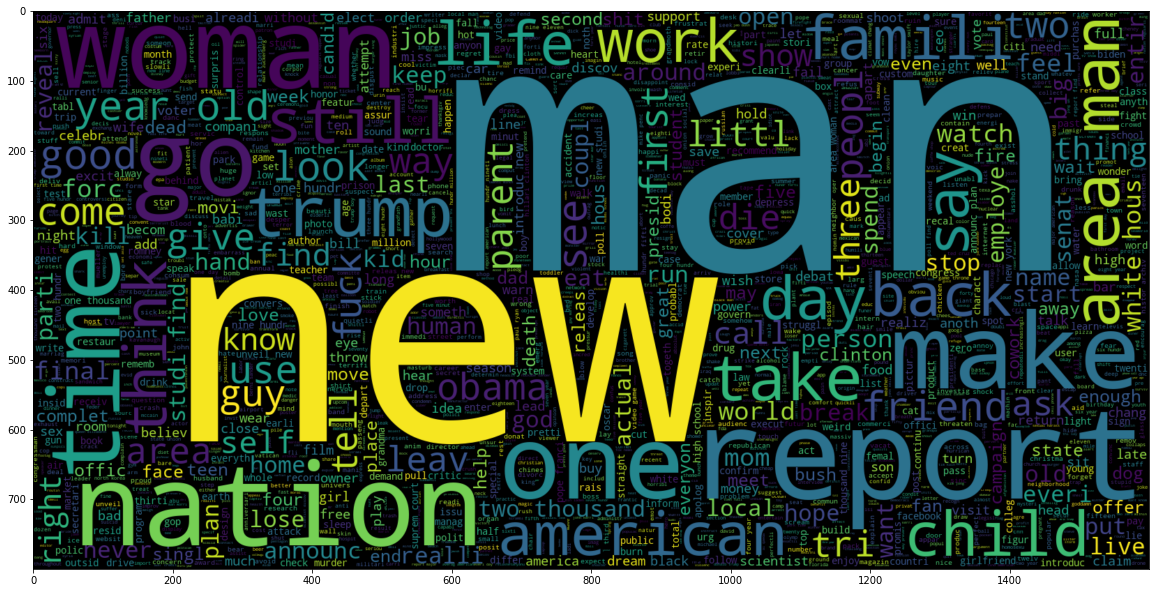

In [ ]:
#### visualizing words that belong to positive class
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Text that is Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(new_fake[new_fake.is_sarcastic == 1].headline))
plt.imshow(wc , interpolation = 'bilinear');

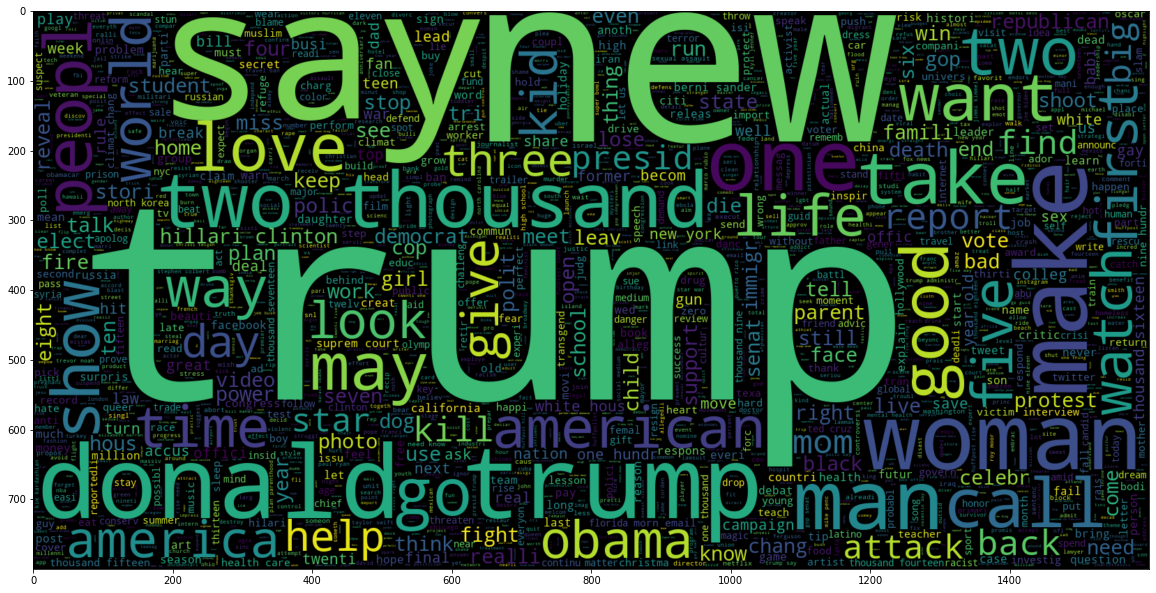

In [ ]:
#### visualizing words that belong to negative class
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Text that is Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(new_fake[new_fake.is_sarcastic == 0].headline))
plt.imshow(wc , interpolation = 'bilinear');

(array([1.1649e+04, 1.9740e+03, 9.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  6. ,  67.9, 129.8, 191.7, 253.6, 315.5, 377.4, 439.3, 501.2,
        563.1, 625. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'Sarcastic text')

(array([4.340e+02, 2.205e+03, 4.635e+03, 5.291e+03, 1.979e+03, 3.680e+02,
        5.200e+01, 1.500e+01, 3.000e+00, 3.000e+00]),
 array([  2. ,  15.8,  29.6,  43.4,  57.2,  71. ,  84.8,  98.6, 112.4,
        126.2, 140. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'Not Sarcastic text')

Text(0.5, 0.98, 'Characters in texts')

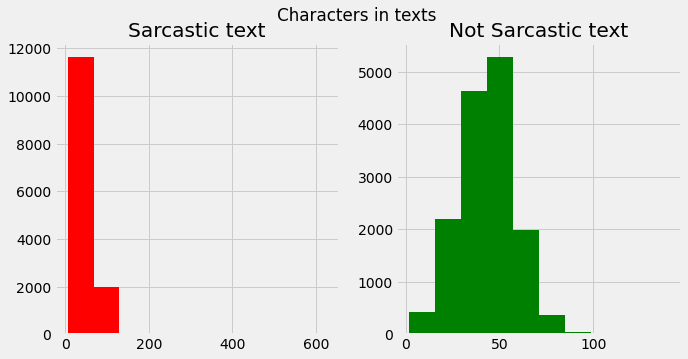

In [ ]:
plt.style.use('fivethirtyeight')
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=new_fake[new_fake['is_sarcastic']==1]['headline'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Sarcastic text')
text_len=new_fake[new_fake['is_sarcastic']==0]['headline'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Not Sarcastic text')
fig.suptitle('Characters in texts')
plt.show();

In [94]:
all_words = new_fake['headline'].str.split()

In [97]:
all_words = list(itertools.chain(*all_words))

# Create counter
counts_no = collections.Counter(all_words)

counts_no.most_common(15)

[('s', 4625),
 ('not', 1981),
 ('trump', 1836),
 ('new', 1696),
 ('man', 1673),
 ('one', 1077),
 ('get', 1012),
 ('woman', 935),
 ('two', 929),
 ('year', 855),
 ('make', 831),
 ('say', 792),
 ('report', 772),
 ('and', 768),
 ('day', 613)]

In [102]:
clean = pd.DataFrame(counts_no.most_common(20),
                             columns=['words', 'count'])

print(clean)

       words  count
0          s   4625
1        not   1981
2      trump   1836
3        new   1696
4        man   1673
5        one   1077
6        get   1012
7      woman    935
8        two    929
9       year    855
10      make    831
11       say    792
12    report    772
13       and    768
14       day    613
15        go    599
16      time    594
17  thousand    590
18    nation    569
19  american    567


Text(0.5, 1.0, 'Common Words Found in Tweets (Including All Words)')

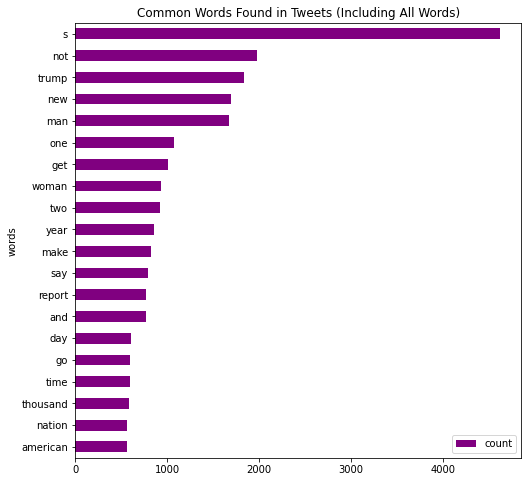

In [103]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

# Step 6: Supervised Classification  on Train/Test and Model Selection
## We will use Validation set for Accuracy

In [65]:
# model 1:-
# SVM
svmodel = LinearSVC();
# training the model
svmodel.fit(features, y_train)
# getting the score of train and test data
print(svmodel.score(features, y_train)) 
print(svmodel.score(features_test, y_test)) 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

0.924524785687663
0.776908023483366


In [68]:
y_pred = svmodel.predict(features_test)# 
# confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
print('-'*20)
cr = classification_report(y_test,y_pred)
print(cr)
print('-'*20)
kappa_score = cohen_kappa_score(y_test,y_pred)
print('Kappa Score =',kappa_score)
print('-'*20)
auc_score = roc_auc_score(y_test,y_pred)
print('AUC Score =',auc_score)


[[1508  365]
 [ 433 1271]]
--------------------
              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1873
           1       0.78      0.75      0.76      1704

    accuracy                           0.78      3577
   macro avg       0.78      0.78      0.78      3577
weighted avg       0.78      0.78      0.78      3577

--------------------
Kappa Score = 0.5520113024923364
--------------------
AUC Score = 0.7755087429721593


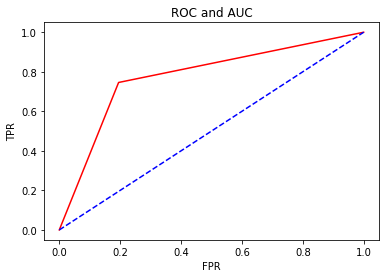

In [71]:
#y_prob_pred = svmodel.predict_proba(features_test)
y#_prob = y_prob_pred[:,1]

fpr,tpr,thresh = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,'r')
plt.plot([0,1],[0,1],'b--')
plt.xlabel('FPR'), plt.ylabel('TPR')
plt.title('ROC and AUC')
plt.show();

In [28]:
svmodel2 = LinearSVC();
# training the model
svmodel2.fit(features_BOW, y_train_ns)
# getting the score of train and test data
print(svmodel2.score(features_BOW, y_train_ns)) 
print(svmodel2.score(features_BOW_test, y_test_ns)) 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

0.9815970928065598
0.7693597987140062


In [72]:
gb2 = GaussianNB() ### please run again
gb2.fit(features_BOW, y_train_ns)
print(gb2.score(features_BOW, y_train_ns))
print(gb2.score(features_BOW_test, y_test_ns))  

NameError: ignored

In [73]:
# model 2:-Using Naive Bayes(multinomial, gaussian, binomial)
gb = GaussianNB()
gb.fit(features, y_train)
print(gb.score(features, y_train))
print(gb.score(features_test, y_test))  

GaussianNB(priors=None, var_smoothing=1e-09)

0.7856410734252702
0.6558568632932625


In [74]:
y_pred = gb.predict(features_test)# 
# confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
print('-'*20)
cr = classification_report(y_test,y_pred)
print(cr)
print('-'*20)
kappa_score = cohen_kappa_score(y_test,y_pred)
print('Kappa Score =',kappa_score)
print('-'*20)
auc_score = roc_auc_score(y_test,y_pred)
print('AUC Score =',auc_score)


[[1666  207]
 [1024  680]]
--------------------
              precision    recall  f1-score   support

           0       0.62      0.89      0.73      1873
           1       0.77      0.40      0.52      1704

    accuracy                           0.66      3577
   macro avg       0.69      0.64      0.63      3577
weighted avg       0.69      0.66      0.63      3577

--------------------
Kappa Score = 0.29492254020785214
--------------------
AUC Score = 0.6442715735595276


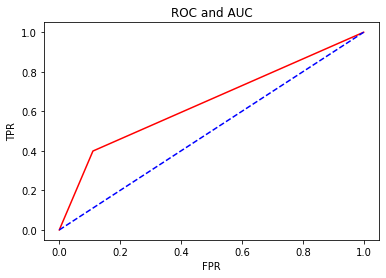

In [75]:
fpr,tpr,thresh = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,'r')
plt.plot([0,1],[0,1],'b--')
plt.xlabel('FPR'), plt.ylabel('TPR')
plt.title('ROC and AUC')
plt.show();

In [ ]:
mnb = MultinomialNB()
mnb = GaussianNB()
mnb.fit(features, y_train)
print(mnb.score(features, y_train))
print(mnb.score(features_test, y_test))  


GaussianNB(priors=None, var_smoothing=1e-09)

0.7838706671636229
0.6614481409001957


In [ ]:
bnb = BernoulliNB()
bnb = GaussianNB()
bnb.fit(features, y_train)
print(bnb.score(features, y_train))
print(bnb.score(features_test, y_test))  

GaussianNB(priors=None, var_smoothing=1e-09)

0.7838706671636229
0.6614481409001957


In [76]:
# model 3:- Logistic Regression
lr = LogisticRegression()
lr.fit(features, y_train)
print(lr.score(features, y_train)) 
print(lr.score(features_test, y_test))  

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

0.8644241520685799
0.7886497064579256


In [77]:
y_pred = lr.predict(features_test)# 
# confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
print('-'*20)
cr = classification_report(y_test,y_pred)
print(cr)
print('-'*20)
kappa_score = cohen_kappa_score(y_test,y_pred)
print('Kappa Score =',kappa_score)
print('-'*20)
auc_score = roc_auc_score(y_test,y_pred)
print('AUC Score =',auc_score)


[[1549  324]
 [ 432 1272]]
--------------------
              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1873
           1       0.80      0.75      0.77      1704

    accuracy                           0.79      3577
   macro avg       0.79      0.79      0.79      3577
weighted avg       0.79      0.79      0.79      3577

--------------------
Kappa Score = 0.5751389017196099
--------------------
AUC Score = 0.7867471782107487


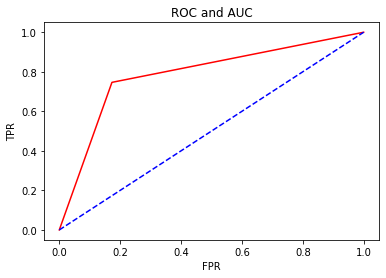

In [78]:
fpr,tpr,thresh = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,'r')
plt.plot([0,1],[0,1],'b--')
plt.xlabel('FPR'), plt.ylabel('TPR')
plt.title('ROC and AUC')
plt.show();

In [31]:
lr2 = LogisticRegression(max_iter= 200)
lr2.fit(features_BOW, y_train_ns)
print(lr2.score(features_BOW, y_train_ns))
print(lr2.score(features_BOW_test, y_test_ns))  

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

0.9302553112187849
0.7864131954151523


In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators = 10, random_state = 0)
rf.fit(features, y_train)
print(rf.score(features, y_train)) 
print(rf.score(features_test, y_test))   

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

0.9845322400298173
0.7377690802348337


In [23]:
from sklearn.neighbors import KNeighborsClassifier
#nei = KNeighborsClassifier().fit(features, y_train)
#print(nei.score(features, y_train)) 
#print(nei.score(features_test, y_test)) 

**As of now we can see that Logistic Regression has worked well, it makes sense as it is a binary classification**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model_graad =GradientBoostingClassifier(n_estimators=100)
model_graad.fit(features, y_train)
print(model_graad.score(features, y_train))
print(model_graad.score(features_test, y_test))  

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

0.6898061871039881
0.6712328767123288


**from the above we can see that all the model suferred overfitting problem ,but Boosting gave a less accuracy score but  more unbiased  and stable result result**
#  Step7:Model selection: using CV, model(KF) tuning etc
## Since from the basic modeling we obtained better solutions for LR,SVM,NAIVE Bayes we consider their perfromance using cross validation

In [46]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
models.append(('SVM', LinearSVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=101,shuffle=True)
	cv_results = model_selection.cross_val_score(model,Tf_full, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


LR: 0.790524 (0.004758)
NB: 0.663406 (0.006377)
SVM: 0.786715 (0.006590)


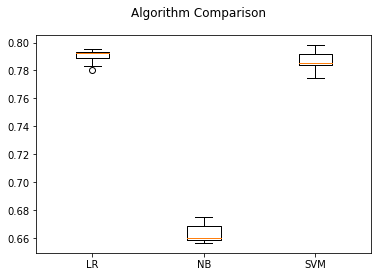

In [47]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();

## Building a data Frame for accuracy scores

In [61]:
result = pd.DataFrame(results)
result.rename(index = {0:'LR',1:'GNB',2:'SVM'})


0         1         2  ...         7         8         9
LR   0.792453  0.795248  0.792453  ...  0.783019  0.792103  0.792380
GNB  0.675052  0.657582  0.671209  ...  0.658980  0.669113  0.667948
SVM  0.792802  0.794200  0.788260  ...  0.780922  0.798043  0.784691

[3 rows x 10 columns]

In [62]:
print(models)   ### description

[('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)), ('NB', GaussianNB(priors=None, var_smoothing=1e-09)), ('SVM', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0))]


## From the above  analysis even though Logistic Regression gave better results , choosing SVM would be a better options considering ability to differential well at boundaries
## Scope:The scope of the models is resticted to certain accuracies because of the irreducable noise in the data , Hence moving to deep neural networks would yield better results

#  step 8: Model Validation

In [79]:
### calculating validation scores for our models
gb.score(valid, y_val)


0.6581889323644494

In [80]:
svmodel.score(valid, y_val)

0.7833985466741196

In [81]:
lr.score(valid, y_val)

0.7853549468977082

# **It can be clearly seen that the SVM performs the best on the unseen data used for model evaluation**